<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Условия-задачи" data-toc-modified-id="Условия-задачи-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Условия задачи</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Используемые-библиотеки" data-toc-modified-id="Используемые-библиотеки-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Используемые библиотеки</a></span></li><li><span><a href="#Используемые-константы" data-toc-modified-id="Используемые-константы-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Используемые константы</a></span></li><li><span><a href="#Свои-функции-использумые-в-проекте" data-toc-modified-id="Свои-функции-использумые-в-проекте-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Свои функции использумые в проекте</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Выделение-сэмпла-для-ускорения-тестирования-модели" data-toc-modified-id="Выделение-сэмпла-для-ускорения-тестирования-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выделение сэмпла для ускорения тестирования модели</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Разделение-на-тренировочную-и-тестовую-выборки" data-toc-modified-id="Разделение-на-тренировочную-и-тестовую-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разделение на тренировочную и тестовую выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

##  Введение

### Описание проекта

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

### Цель проекта

Обучить модель классифицировать комментарии на позитивные и негативные.

### Описание исследования

В нашем распоряжении набор данных с разметкой о токсичности правок.
Решить задачу можно как с помощью BERT, так и без этой нейронки.

### Задачи исследования

1. Загрузить и подготовить данные.
2. Обучить разные модели. 
3. Сделать выводы.

### Условия задачи

Постройть модель со значением метрики качества *F1* не меньше 0.75. 

### Исходные данные

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

###  Используемые библиотеки

In [1]:
import os # для проверки наличия директорий при загрузке данных

# библиотека для редактирования текста в HTML при выводе display()
from IPython.core.display import HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re #для использования регулярных выражения, для очистки текста

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score


import spacy #лемматизация текста
nlp = spacy.load("en_core_web_sm")

# Для связки GS+pieline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#для отображения прогресса
from tqdm.notebook import tqdm
tqdm.pandas()

from sklearn.metrics import classification_report

### Используемые константы

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Свои функции использумые в проекте

**Загрузка данных**

In [3]:
def load_df(file, index='id'):
    pth1 = f'/datasets/{file}'
    pth2 = f'{file}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1, index_col=0, na_values=np.nan)
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2, index_col=0, na_values=np.nan)
    else:
        print('Что-то пошло не так')
    
    return df

**Функция вывода данных и их описания**

In [4]:
def get_data_info(df):
    display(df.head())
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Информации о датафрейме</b></font>'))
    df.info()
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Описание данных</b></font>'))
    display(df.describe().T)
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Количество пропусков</b></font>'))
    display(df.isna().sum())
    display(HTML('<br>'))
    display(HTML('<font color="gray"><b>Количество дубликатов</b></font>'))
    display(df.duplicated().sum())
    display(HTML('<br>'))

**Функция очистки и лемматизации текста**

In [5]:
def clean_lemmatize_text(text):
    text = re.sub(r'\n', ' ', text)  # Удаление переносов строк
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Удаление небуквенных символов
    text = text.lower()  # Приведение к нижнему регистру
    
    lem_text = nlp(text)
    return " ".join([token.lemma_ for token in lem_text if not token.is_stop])

## Подготовка

### Загрузка данных

In [6]:
data = load_df('toxic_comments.csv')

In [7]:
get_data_info(data)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


,count,mean,std,min,25%,50%,75%,max
toxic,159292.0,0.101612,0.302139,0.0,0.0,0.0,0.0,1.0


text     0
toxic    0
dtype: int64

0

### Выделение сэмпла для ускорения тестирования модели

**Распределение таргета до сэмлирования**

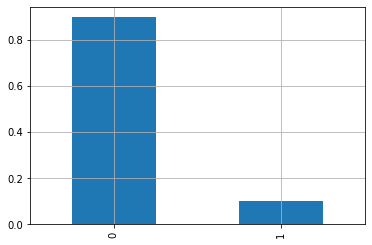

In [8]:
data['toxic'].value_counts(normalize=(0,1)).plot(kind='bar', grid=True)
plt.show()

In [9]:
data_sample = data.sample(frac=0.25, random_state=RANDOM_STATE)

In [10]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39823 entries, 31055 to 69305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39823 non-null  object
 1   toxic   39823 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 933.4+ KB


**Распределение таргета после сэмлирования**

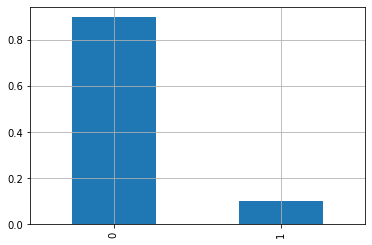

In [11]:
data_sample['toxic'].value_counts(normalize=(0,1)).plot(kind='bar', grid=True)
plt.show()

### Очистка текста

**Проверка функции очистки и лемматизации текста**

In [12]:
sentence1 = "The striped bats are hanging on their feet for best\n"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
display(df_my)


display(df_my['text'].apply(clean_lemmatize_text))

,text
0,The striped bats are hanging on their feet for...
1,you should be ashamed of yourself went worked


0    stripe bat hang foot good
1              ashamed go work
Name: text, dtype: object

**Очищаем и лемматизируем текст**

In [13]:
data_sample['clean_text'] = data_sample['text'].progress_apply(clean_lemmatize_text)
data_sample.head()

  0%|          | 0/39823 [00:00<?, ?it/s]

,text,toxic,clean_text
31055,"Sometime back, I just happened to log on to ww...",0,happen log wwwizoomin friend reference amazed ...
102929,"""\n\nThe latest edit is much better, don't mak...",0,late edit well not article state super
67385,""" October 2007 (UTC)\n\nI would think you'd be...",0,october utc think d able point immune ob...
81167,Thanks for the tip on the currency translation...,0,thank tip currency translation think
90182,I would argue that if content on the Con in co...,0,argue content con comparison art music proport...


### Разделение на тренировочную и тестовую выборки

In [14]:
# Разделение данных на признаки и целевую переменную
X = data_sample['clean_text']
y = data_sample['toxic']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [15]:
X_train.shape, X_test.shape

((31858,), (7965,))

## Обучение

In [16]:
# Пайплан моделей

pipelines = {
    'logistic_regression': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
    ]),
    'linear_svc': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LinearSVC(random_state=RANDOM_STATE, max_iter=1000))
    ]),
    'random_forest': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
    ])
}

In [17]:
# Параметры моделей

param_grids = {
    'logistic_regression': {
        'tfidf__max_features': [5000],
        'tfidf__ngram_range': [(1, 2)],
        'classifier__C': [1, 10]
    },
    'linear_svc': {
        'tfidf__max_features': [5000],
        'tfidf__ngram_range': [(1, 2)],
        'classifier__C': [1, 10]
    },
    'random_forest': {
        'tfidf__max_features': [5000],
        'tfidf__ngram_range': [(1, 2)],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20]
    }
}

In [18]:
# Запуск GridSearchCV для каждой модели
results = {}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='f1', cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_f1 = grid_search.best_score_

    results[model_name] = {
        'best_params': best_params,
        'best_f1': best_f1}
    

results

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'logistic_regression': {'best_params': {'classifier__C': 10,
   'tfidf__max_features': 5000,
   'tfidf__ngram_range': (1, 2)},
  'best_f1': 0.7213502936682835},
 'linear_svc': {'best_params': {'classifier__C': 1,
   'tfidf__max_features': 5000,
   'tfidf__ngram_range': (1, 2)},
  'best_f1': 0.7243064711293759},
 'random_forest': {'best_params': {'classifier__max_depth': 20,
   'classifier__n_estimators': 50,
   'tfidf__max_features': 5000,
   'tfidf__ngram_range': (1, 2)},
  'best_f1': 0.19563425350659394}}

In [19]:
# Выбор лучшей модели
best_model_name = max(results, key=lambda x: results[x]['best_f1'])
best_model_params = results[best_model_name]['best_params']

# Получение лучшей модели из pipelines и ее обучение
best_pipeline = pipelines[best_model_name]
best_pipeline.set_params(**best_model_params)
best_pipeline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_test_pred = best_pipeline.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)

display(f'test_f1: {test_f1}')

'test_f1: 0.7636621717530163'

## Выводы

**Загрузка данных**

Датасет содержит 159292 строк. Признаки данных:
 -  `text` - текстовый комментарий;
 - `toxic` - классификация токсичности комментария.
Пропущенных данных и дублей нет.
Токсичных комментариев в датасете ~ 10%.

**Подготовка данных**

- Для построения моделей использовался сэмпл от данных размером 25% от общей выборки - 39823 строк. 
- Данные были очищены с помощью регулярных выражений и лимматизировыны с помощью библиотеки `spacy`.
- Разделили выборку на тренировочную и тестовую в соотношении 80:20.

**Обучение моделей**

- Использовали связку GridSearchCV + pipeline. 
- Векторайз - TfidfVectorizer
- Используемые модели:
    - logistic_regression,
    - linear_svc,
    - random_forest.

**Оценка моделей**

Лучшей моделью по метрике `F1` стала logistic_regression, показав на тесте ~ 0.764

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны